# # K-means and Principal Component Analysis

 #### In this project, we are asked to apply the k-means clustering algorithm, and perform principal component analysis on words found in 50 books from project Gutenberg.

###### It should be noted that this notebook is an attempt to explain the project as though I was explaining it to someone who has no familiarity with the project whatsoever.

### Step 1

In the following cell, I load the 50 "books". This cell also contains most of the functions that I defined. One should not worry him/herself with the details of the code in many of the functions in this cell block (although most, if not all of them self-explanatory.) Since they will be explained later, when I actually get to use them in the code.

In [2]:
import os.path as op
import os
import re

path = "../books"


#step 1, the loading
books = [file for file in os.listdir(path) if op.isfile(op.join(path, file))]
#print(len(books))

#step 2
##return key given value
def findKey(vl, l):
    for key, value in l:
        if value == vl:
             return key 
        else:
            pass
        
def contain_m_t_1(l, w):
    if w == l[0]:
        return True
    else:
        contain_m_t_1(l[1:], w)

def get20(l):
    l = sorted(l)
    l.reverse()
    return take(20, l)

def take(n, l):
    toreturn = []
    for i in range(n):
        toreturn.append(l[i])
    return toreturn

def sort_dict(dictio):
    return [(key, val) for val in sorted(list(dictio.values())) for (key, val) in dictio.items()]

def get_norm_freqs(top_20, big_list):
    norm_freqs = []
    for book, dictio in big_list:
        freq_list = []
        for word, tt_w_freq in top_20:
            try:
                freq_list.append((word, (dictio[word]/tt_w_freq)))
            except:
                freq_list.append((word, 0))
        norm_freqs.append((book, freq_list))
        
    frequencies = []
    for book, listf in norm_freqs:
        bk_fs = []
        for word, diction in listf:
            bk_fs.append(diction)
        frequencies.append(bk_fs)
        
    return frequencies

def get_title(file):
    finPath = op.join(path, file)
    fin = open(finPath, 'r')
    for line in fin.readlines():
        if "Title" in line:
            return line[6:].strip() 
        else:
            pass

    


### sub_Step 1 : Data Cleaning 

After making sure that the books are loaded as I would have wished them to, and making sure that I have all the tools necessary to process them, in the next cell block, I take on the task of using regular expressions to parse through the text and remove all the unwanted characters including spaces, and storing my data, in a big list called lines for each book. The list comprehensions come in handy in the sense that they keep the code more concise. I made sure to comment the code in a very convenient way so that one understand what is going on in each sublock of code for both the reader's convenience, as well as my own reference as I was writing the code and debugging.

In [3]:

lines = []
each_dict_list = []
for file in books:
    finPath = op.join(path, file)
    fin = open(finPath, 'r')
    lines = [re.sub(r'don\'t', 'dont',line.strip().lower()) for line in fin]
    lines = [re.sub(r'[^a-zA-Z]', ' ',line.strip().lower()) for line in lines]
    lines = [re.sub(r'[\W+_+\d+]', ' ',line.strip().lower()) for line in lines]
    lines = [re.sub(r'[_+\d+]', '',line.strip().lower()) for line in lines]
    
    

    
    
# add words in dict for each book
    freq_dict_each = {}
    for sent in lines:
        l = sent.split()
        for word in l:
            
            #add in each book
            if (word not in freq_dict_each.keys()):
                freq_dict_each[word] = 1
            else:
                freq_dict_each[word] += 1
    
    # export these dictionaries into a bigger dict for later reference.
    each_dict_list.append((get_title(file), freq_dict_each))

### Step 3: Top 20 most frequent words.

In the description of the project above, I mentioned that we are going to perform some of the most common data analysis techinique on a list of 50 books, but one cannot possibly perform mathematical, or specifically statistical operations on a bunch of strings. Instead, what this project asks us to do, is to calculate the top 20 most frequent words in this whole bunch of books, find out exactly how frequent they are by summing up their frequencies in each book for the whole 50 books, and then finding normalized frequencies for each book based on these 20 overall frequencies. In other words, we want to find a 20 long vector of frequencies for each book.







The cell block above, and the one below are thus decicated to finding the 20 most frequent words in the whole corpus. the approach taken is the following. first, we make a dictionary of each word, and how frequent the word is in each of the 50 books (cell above).
Then in the cell below, we sum of each word's frequencies from the whole 50 books to find out how popular the word must have been.
Then we sort the list of values from this bigger dictionary of the sums, reverse it to get the bigger ones and take the first twenty elements of the resulting list (this is taken care of by the get20 function defined in the first cell block, used here to get valds_20). Then we figure out, which keys must have corresponded to these biggest values using the getKey function (also defined in the first cell block). Zip them back together, and boom, we have our dictionary of the most frequent words and their frequencies next to each other.







In [4]:
total_wdict = []
current_dict = {}
dicts = [s for _, s in each_dict_list]
books = [b for b, _ in each_dict_list]
for d in dicts:
    for wd, fq in d.items():
        for book, wdict in each_dict_list:
            if wd in current_dict.keys():
                current_dict[wd] += fq
            else:
                current_dict[wd] = fq
total_wdict = [(k, v) for k, v in current_dict.items() if current_dict[k] == v]
total_wdict_alias = ([ a for a,b in total_wdict if (len(a) > 1 or a == "i" or a=="a")], [ b for a,b in total_wdict if (len(a) > 1 or a == "i" or a=="a")])
valds = total_wdict_alias[1]
words = total_wdict_alias[0]

valds_20 = get20(valds)

words_20 = [findKey(v, dict(total_wdict).items()) for v in valds_20]
twenty_tops = list(zip(words_20, valds_20))

This one line of code calls the get_norm_freqs function(also defined in the first cell block) which basically all it's doing is take the frequency of each of the top 20 words in each book,  and devide by its all overall frequency from the whole corpus and then stick them the frequencies next to the words, to create a new dictionary of the words and their corresponding normalized frequencies.

In [5]:
 
frequencies = get_norm_freqs(twenty_tops, each_dict_list)


## Step 4: K-means clustering analysis.

In case the reader is unfamiliar with what k-means clustering is, he/she can read more about it <a href="">here</a> . In brief, it is an algorithm that works as follows: its aim is to group the data into a bunch of clusters, so, the algorithm starts by choosing a number k representing the number of desired clusters. Next, k points called centroids are chosen based on which the clusters are made by figuring out just how far each point is from each point among the k centroids and to whichever centroid each point is closer to, it is put in its cluster, thus the k clusters. Therefore, the next 2 cell blocks are dedicated to calculating the relevant values in the k-means clustering while the third plots the our normalized frequencies based on k, the number of centroids equal to three. The different points are differently depending on which cluster they belong in. The centroids are plotted as squares.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans, vq
data = np.array(frequencies).T.reshape(51, 20)

k = 3
centroids, distortion = kmeans(data, k)

In [7]:
idx, distort2 = vq(data, centroids)

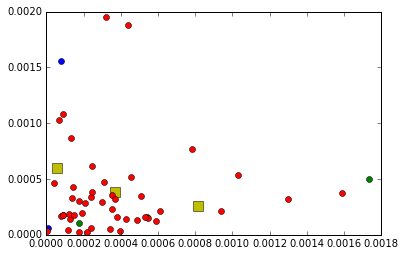

In [8]:
plt.plot(centroids[:, 0], centroids[:, 1], "sy", markersize=10)
for i in range(k):
    plt.plot(data[idx == i, 0], data[idx == i, 1], 'o')


Now, the reader might have already noticed, that the process of choosing the value k seems trivial. However, that is not the case. A graph rightly named as the "elbow chart" plots the values of distortions vs k, and tries to find out the minimum value of k, that causes the minimum distortion in the data which is going to be bent as an elbow; hence the name.
In the next two cells we plot such an elbow chart and we find out that the best k we should use is k = 5. Therefore, in the next cell block, we plot the same graph, with k = 5.

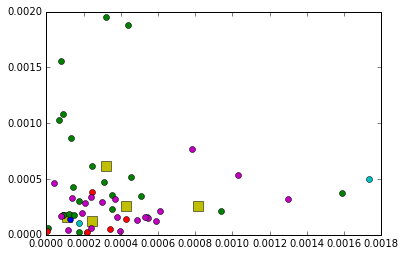

In [9]:
k = 5
centroids, distortion = kmeans(data, k)
idx, distort2 = vq(data, centroids)
plt.plot(centroids[:, 0], centroids[:, 1], "sy", markersize=10)
for i in range(k):
    plt.plot(data[idx == i, 0], data[idx == i, 1], 'o')

In [10]:
kvals = []
dists = []
for k in range(2, 10):
    centroids, distortion = kmeans(data, k)
    kvals.append(k)
    dists.append(distortion)

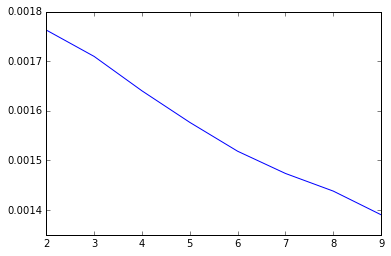

In [11]:
plt.plot(kvals, dists)

## Principal Component Analysis.

Principal component analysis is statistical technique that turns possibly linearly correlated data into an uncorrelated set of orthgonal vectors whose components account for the variability in the data. so the first element (first principal component) accounts has the highest variance, that is, accounts for the highest variability in the data. Thus, by projecting data into this space of orthogonal vectors, principal component analysis provides a way of looking at the same data from a different perspective, and may sometime show relationships where there appeared to be none.
The PCA algorithms are already implemented for us, so what we have to do to use them correctly and that is what is done in the next few following cells. The first graph is of our data projected into PCA space and k of 5. The next graph is 

In [12]:
from matplotlib.mlab import PCA
m = PCA(data)

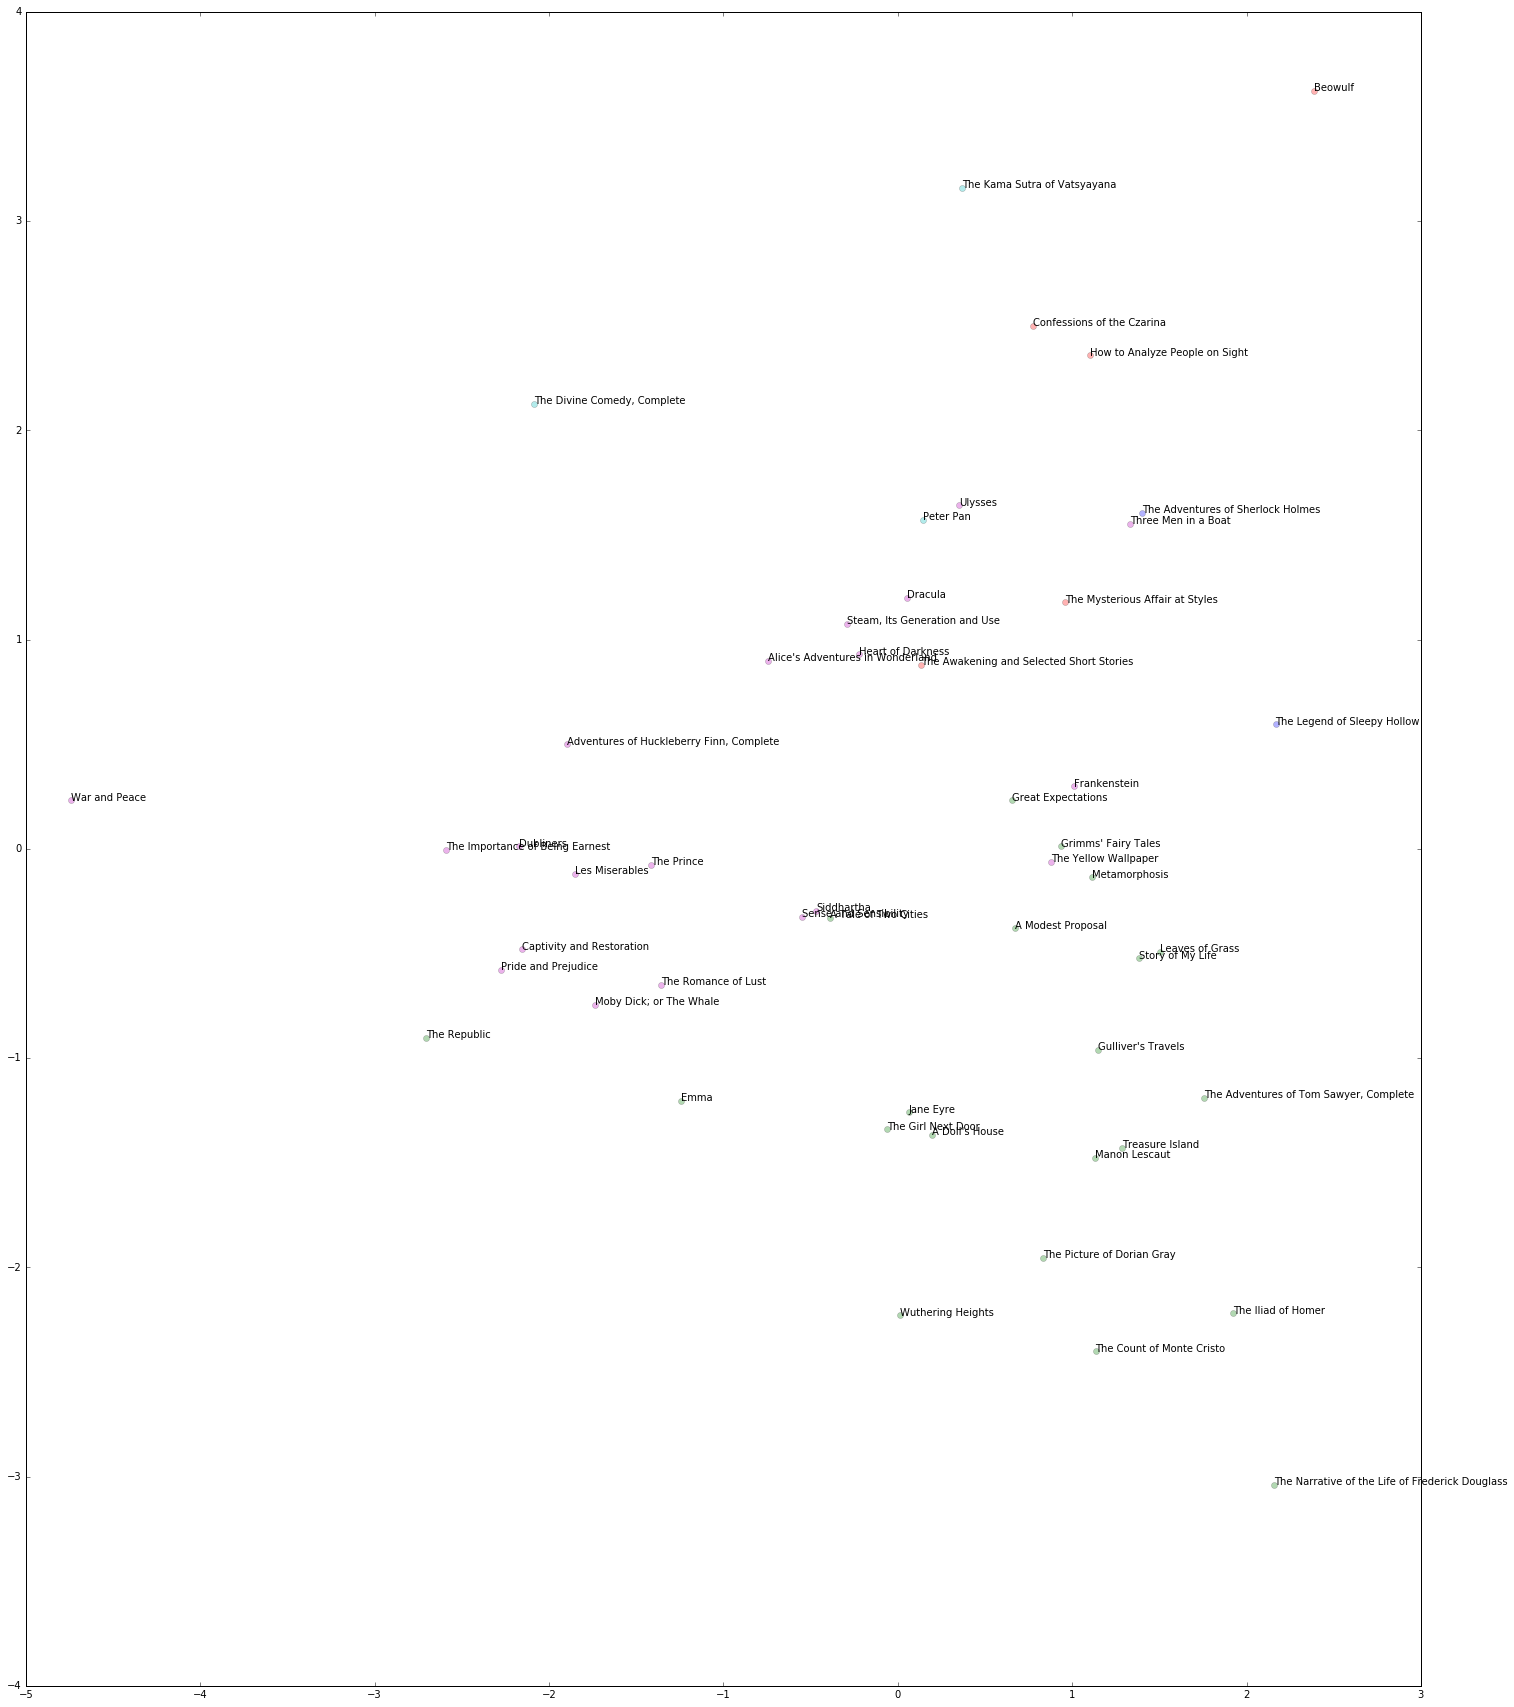

In [13]:
# plt.plot(centroids[:, 0], centroids[:, 1], "sy", markersize=10)
for i in range(5):
    plt.plot(m.Y[idx==i, 0], m.Y[idx==i, 1], "o", alpha=0.3)
#m.Y
fig = plt.gcf()
vt = 0
for b in books:
    plt.text(m.Y[vt, 0], m.Y[vt, 1], b)
    vt += 1
fig.set_size_inches(25,30)

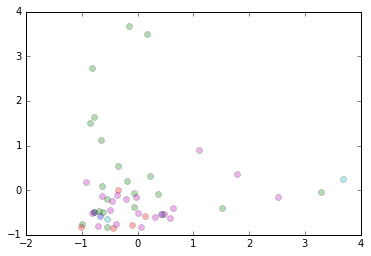

In [14]:
for i in range(5):
    plt.plot(m.a[idx==i, 0], m.a[idx==i, 1], "o", alpha=0.3)

## Without the stop words

Stop words are defined as the words that show up almost in every english sentence one tries to come up with. so Obviously, they made the list of frequent words. But what if we removed them. Which words would be more frequent then. 
the cells below are almost entirely the exact replica of what we did above, except the analysis is made on a sample in which the stop words have been removed.

In [15]:
import urllib.request as ub
stop_words_file = ub.urlopen("http://www.textfixer.com/resources/common-english-words.txt")

stop_words = []
for line in stop_words_file:
    line.strip()
    q = str(line)
    stop_words.append(q)
stop_words = [stop_words[0].split(',')[0][2:]] + stop_words[0].split(',')[1:]

other_l = [(book, dict([(wd, fqs)  for (wd, fqs) in s.items() if wd not in stop_words])) for book, s in each_dict_list]

# other_l

In [16]:
tt_wdict = []
crrent_dict = {}
dicts = [s for _, s in other_l]
for d in dicts:
    for wd, fq in d.items():
        for book, wdict in other_l:
            if wd in crrent_dict.keys():
                crrent_dict[wd] += fq
            else:
                crrent_dict[wd] = fq
tt_wdict = [(k, v) for k, v in crrent_dict.items() if crrent_dict[k] == v]
# print(crrent_dict)
tt_wdict_alias = ([ a for a,b in tt_wdict ], [ b for a,b in tt_wdict ])
vds = tt_wdict_alias[1]
wds = tt_wdict_alias[0]
# print(wds)


tt_wdict_alias = ([ a for a,b in tt_wdict ], [ b for a,b in tt_wdict ])
vds = tt_wdict_alias[1]
wds = tt_wdict_alias[0]

vds_20 = get20(vds)
wds_20 = [findKey(v, dict(tt_wdict).items()) for v in vds_20]
tt_wdict_20 = list(zip(wds_20, vds_20))

print(tt_wdict_20)
freq_nostop = get_norm_freqs(tt_wdict_20, other_l)


[('s', 1682235), ('one', 1146021), ('out', 701505), ('up', 691917), ('your', 654534), ('more', 636837), ('now', 616641), ('man', 616488), ('very', 584511), ('d', 549525), ('time', 513876), ('well', 464355), ('see', 459459), ('little', 448545), ('such', 432990), ('know', 423453), ('two', 409224), ('before', 405297), ('t', 403206), ('good', 399228)]


In [17]:
data2 = np.array(freq_nostop).T.reshape(51, 20)

k = 5
centroids, distortion = kmeans(data2, k)

In [ ]:
idx, distort2 = vq(data2, centroids)
m2 = PCA(data2)

In [ ]:
for i in range(k):
    plt.plot(data2[idx == i, 0], data2[idx == i, 1], 'o')
# plt.xlim(0, 1.3)
# plt.ylim(-0.1, 0.4)
fig = plt.gcf()
vt = 0
for b in books:
    plt.text(m2.Y[vt, 0], m2.Y[vt, 1], b)
    vt += 1
fig.set_size_inches(25,30)

In [ ]:
kvals = []
dists = []
for k in range(2, 10):
    centroids, distortion = kmeans(data, k)
    kvals.append(k)
    dists.append(distortion)
plt.plot(kvals, dists)